Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.

Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1 

Data Set : https://www.kaggle.com/mohansacharya/graduate-admissions

The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.

1. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques ifnecessary.
2. Perform data-preparation (Train-Test Split)
3. Apply Machine Learning Algorithm
4. Evaluate Model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data

In [2]:
data = pd.read_csv("Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
data.shape

(400, 9)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
data.drop("Serial No.",axis=1,inplace=True)

In [12]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
data["Chance of Admit "]=data["Chance of Admit "].apply(lambda x: 1 if x>0.5 else 0)

In [16]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


Familiarizing with data

In [17]:
print("Missing values:\n")
data.isnull().sum()

Missing values:



GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Hence There is no missing value in dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


In [19]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.390875
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.393121
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.279316
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.285939
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.353341
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.455949
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.216193
Chance of Admit,0.390875,0.393121,0.279316,0.285939,0.353341,0.455949,0.216193,1.000000


Visualizing data

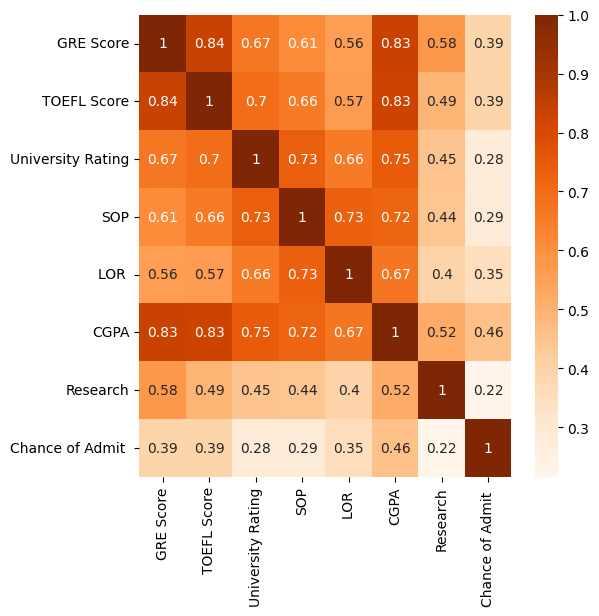

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

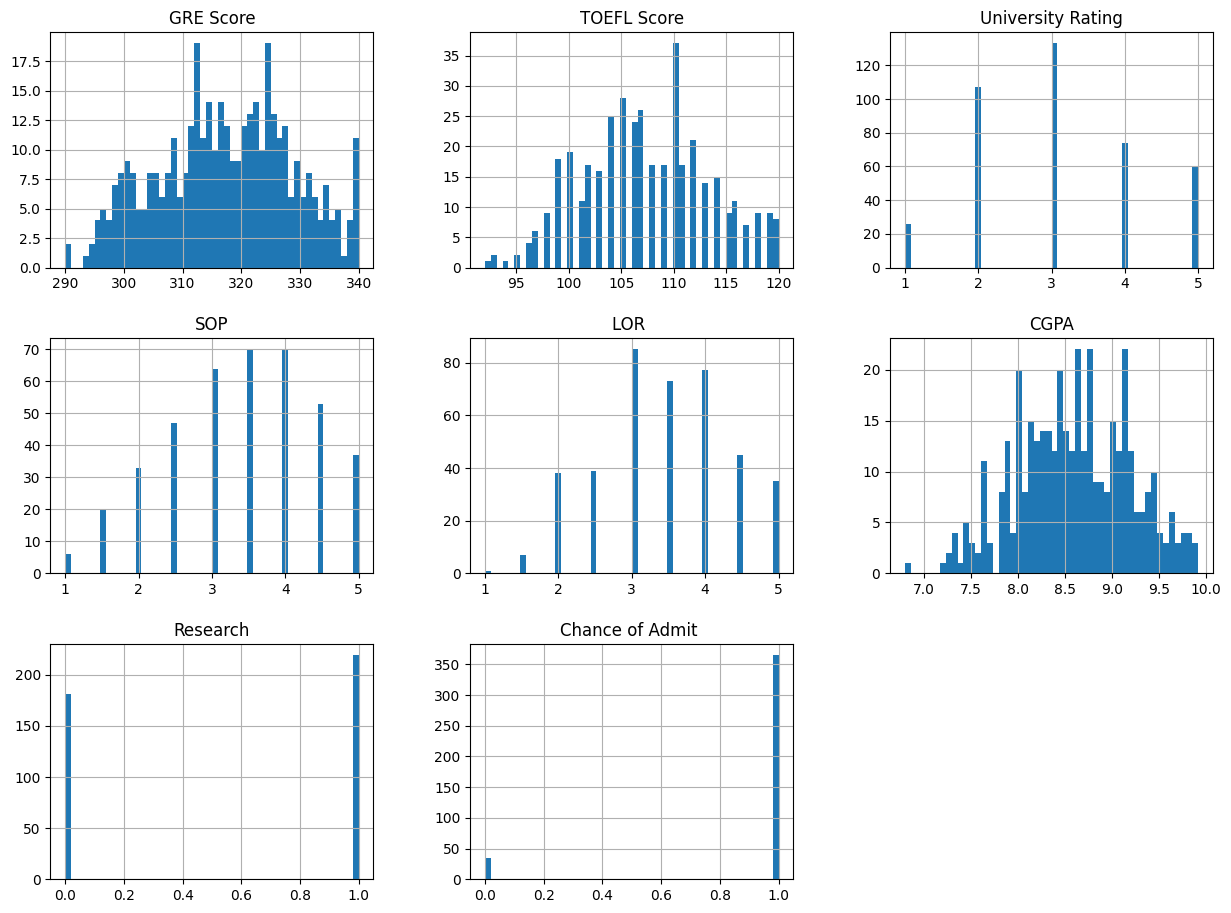

In [22]:
data.hist(bins = 50,figsize = (15,11));

In [23]:
data_admit = data[data['Chance of Admit ']==1]
data_non_admit = data[data['Chance of Admit ']==0]
print("Admitted count       : " ,data_admit.shape[0])
print("Non - Admitted count : " ,data_non_admit.shape[0])

Admitted count       :  365
Non - Admitted count :  35


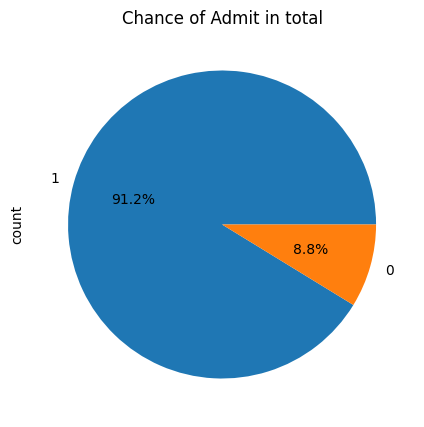

In [24]:
data['Chance of Admit '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Chance of Admit in total")
plt.show()

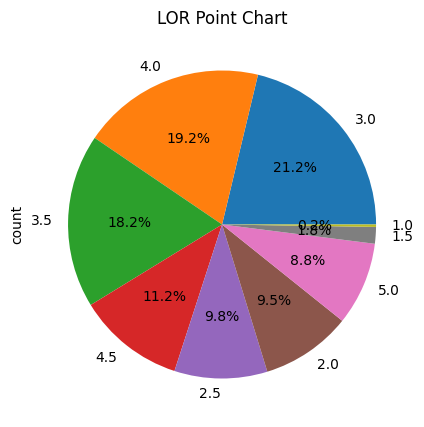

In [25]:
data['LOR '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("LOR Point Chart")
plt.show()


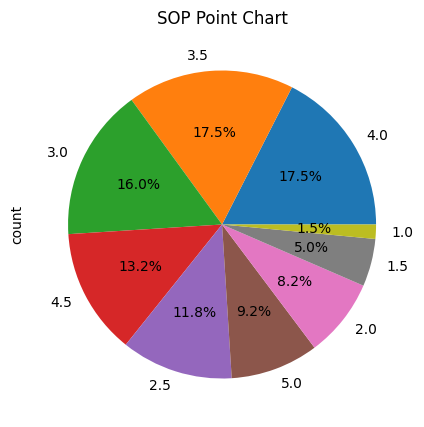

In [26]:
data['SOP'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("SOP Point Chart")
plt.show()


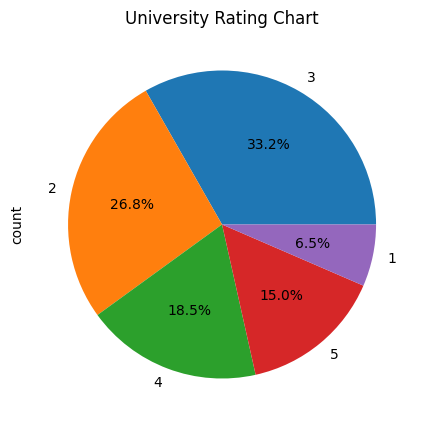

In [27]:
# pie chart for "University Rating"

data["University Rating"].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("University Rating Chart")
plt.show()

In [28]:
#highest GRE score
print("maximum GRE Score : ",data['GRE Score'].max())
#lowest GRE score
print("minimum GRE Score : ",data['GRE Score'].min())

maximum GRE Score :  340
minimum GRE Score :  290


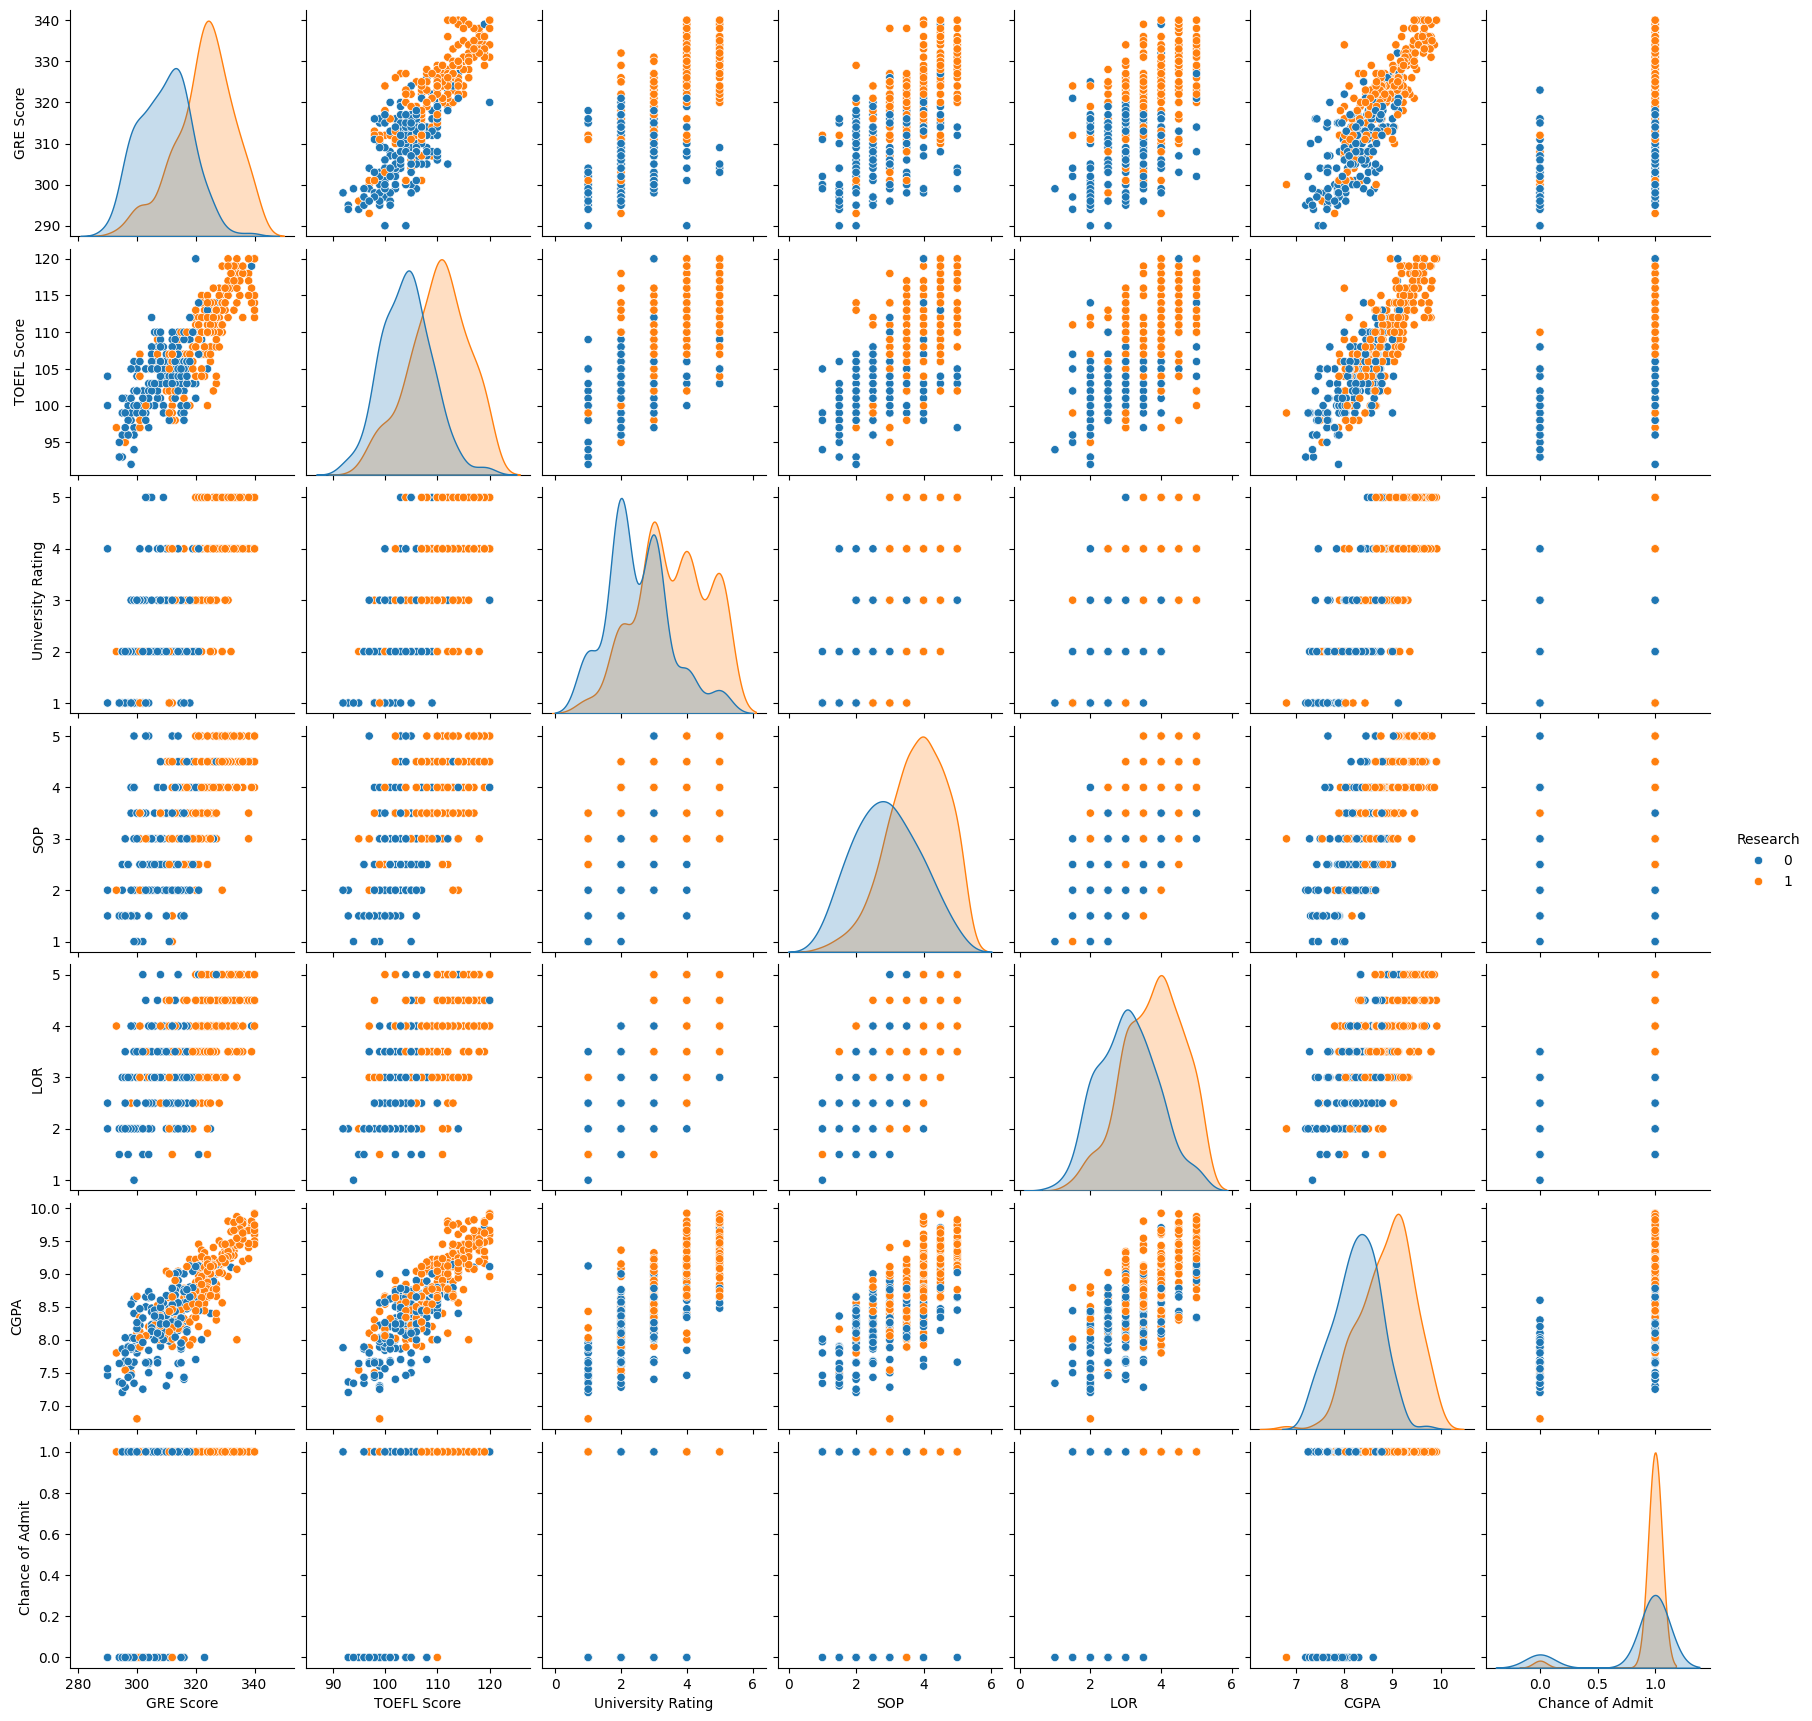

In [29]:
#pairplot based on hue = "Research"

sns.pairplot(data,hue = "Research")

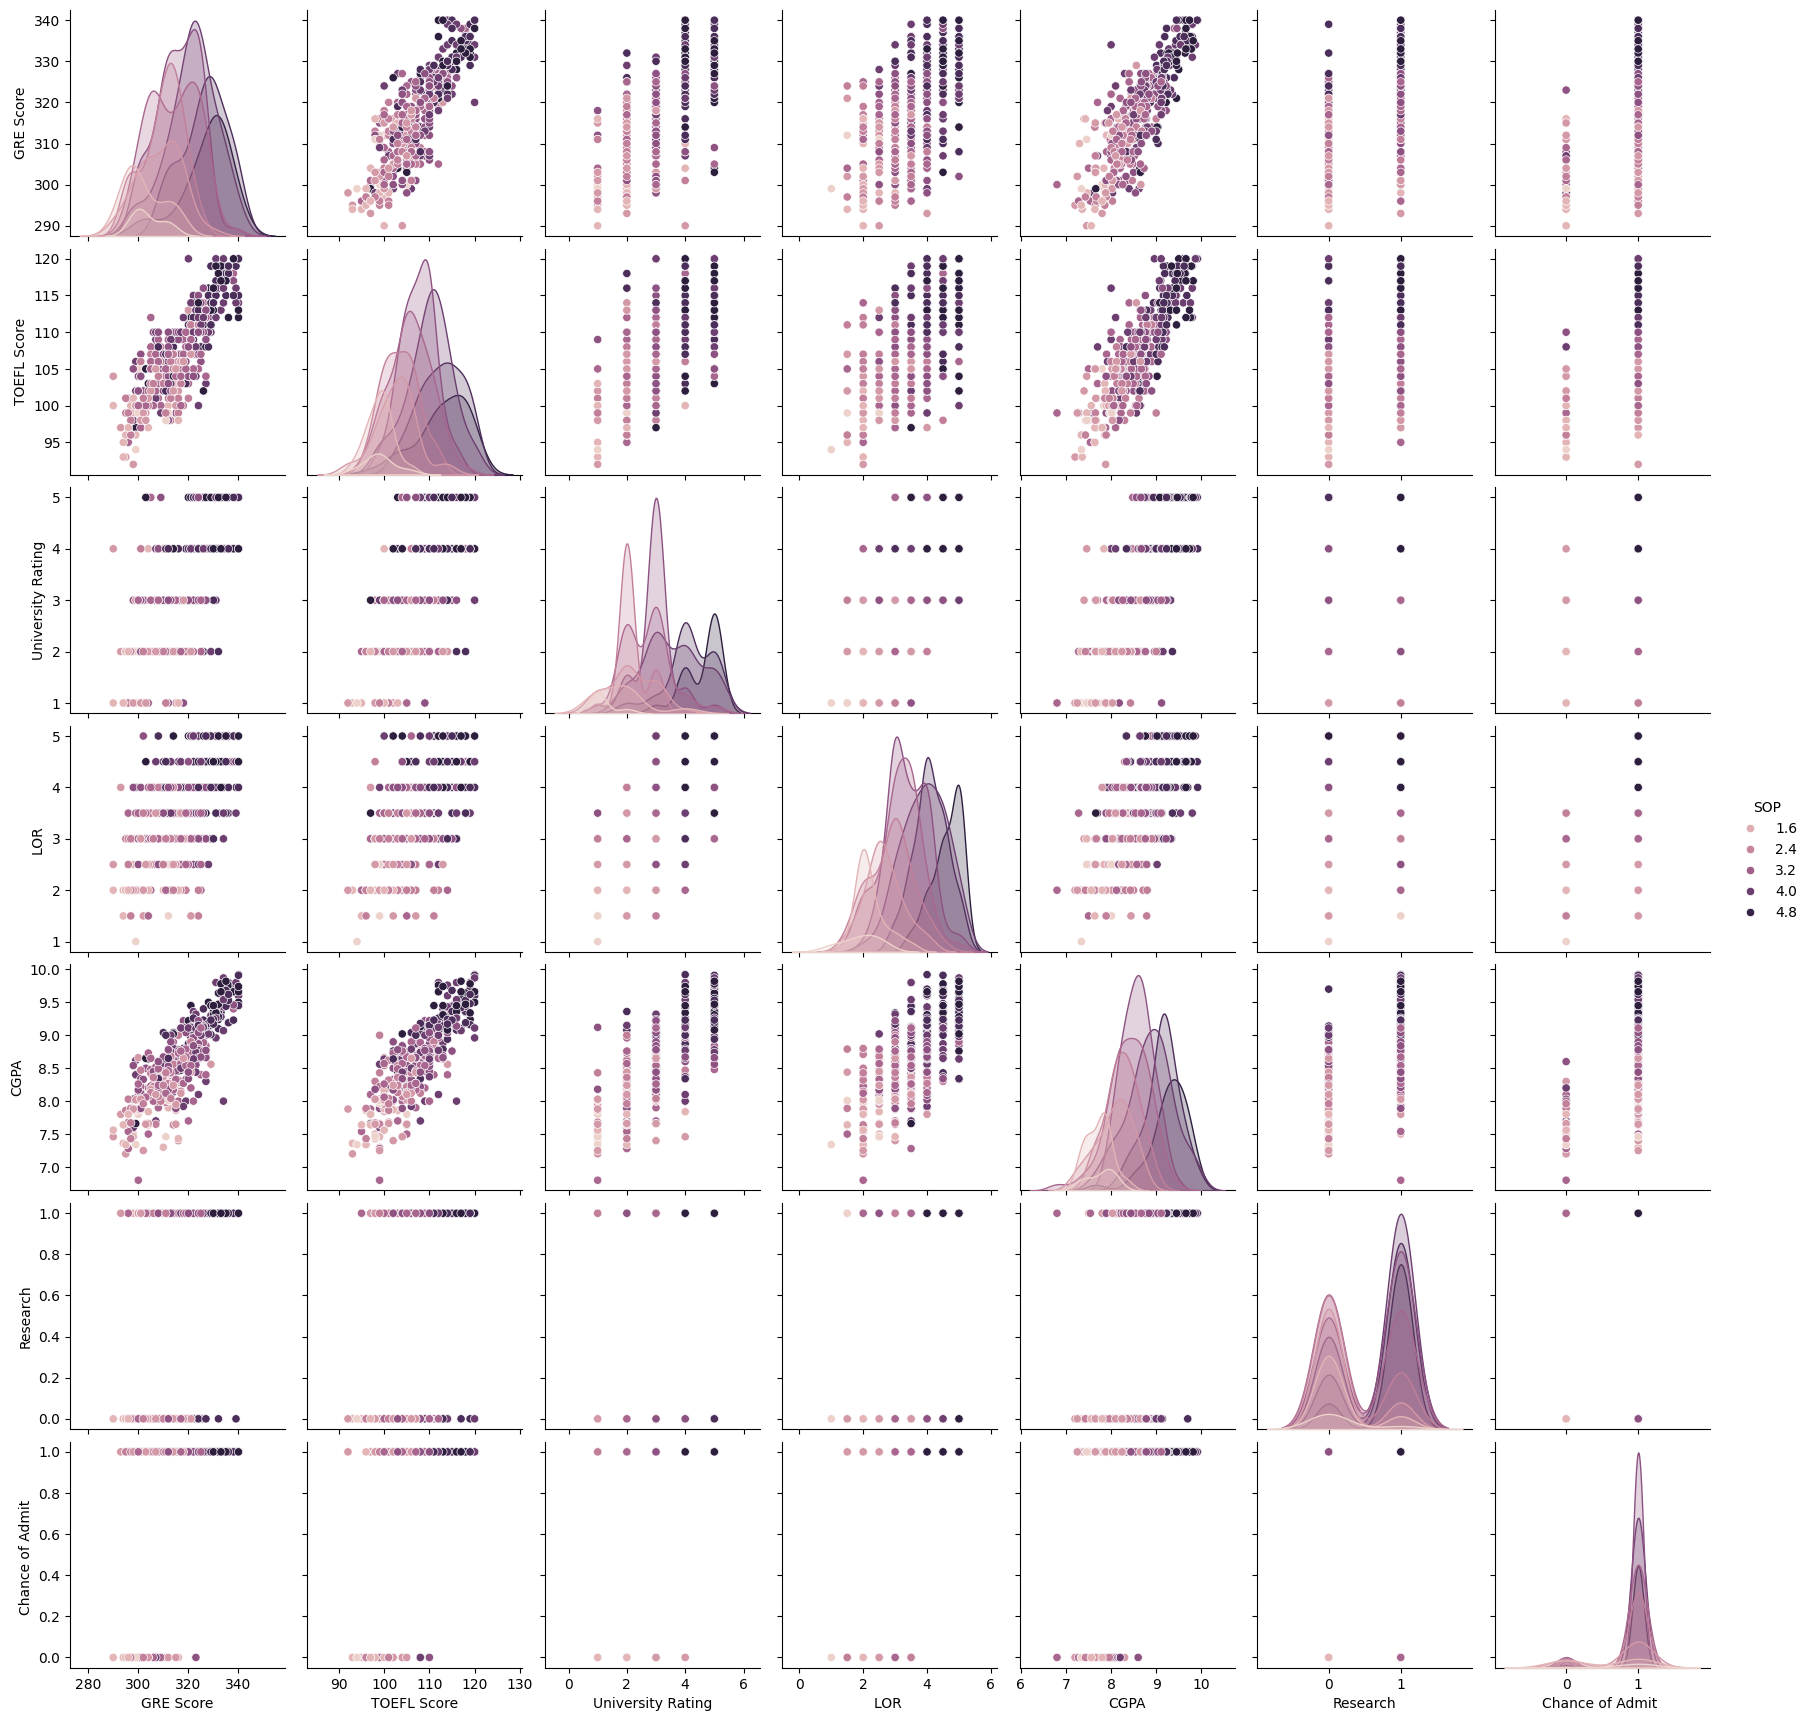

In [30]:
#pairplot based on hue = "SOP"

sns.pairplot(data,hue = "SOP");

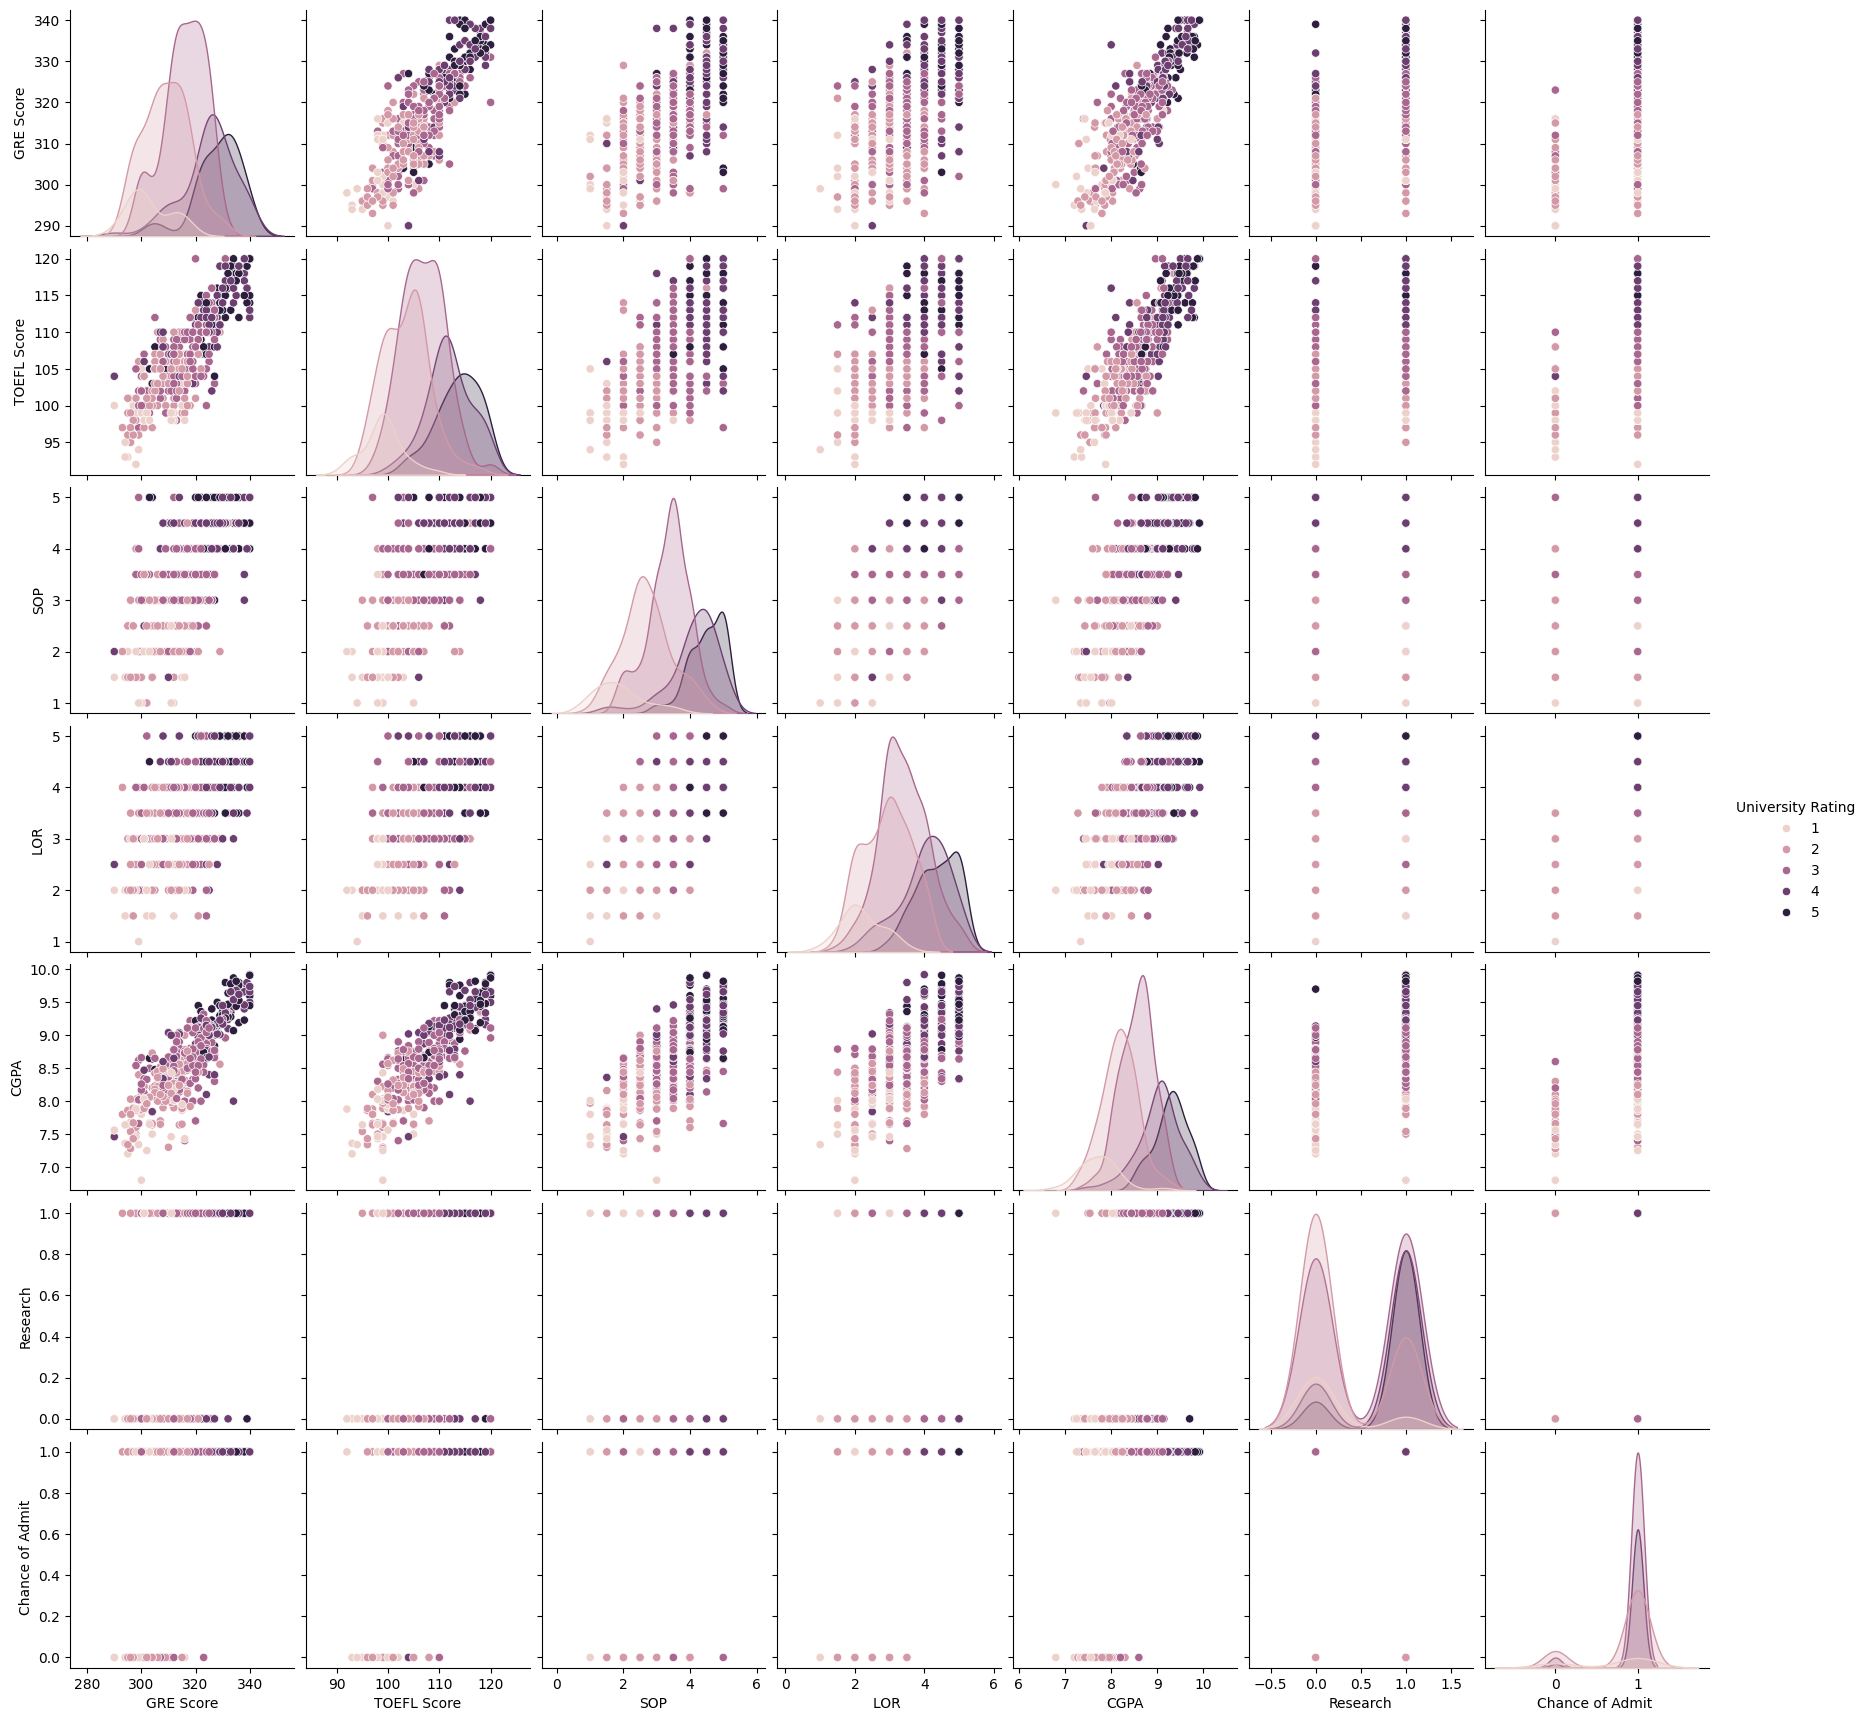

In [31]:
#pairplot based on hue = "University Rating"

sns.pairplot(data,hue = "University Rating");

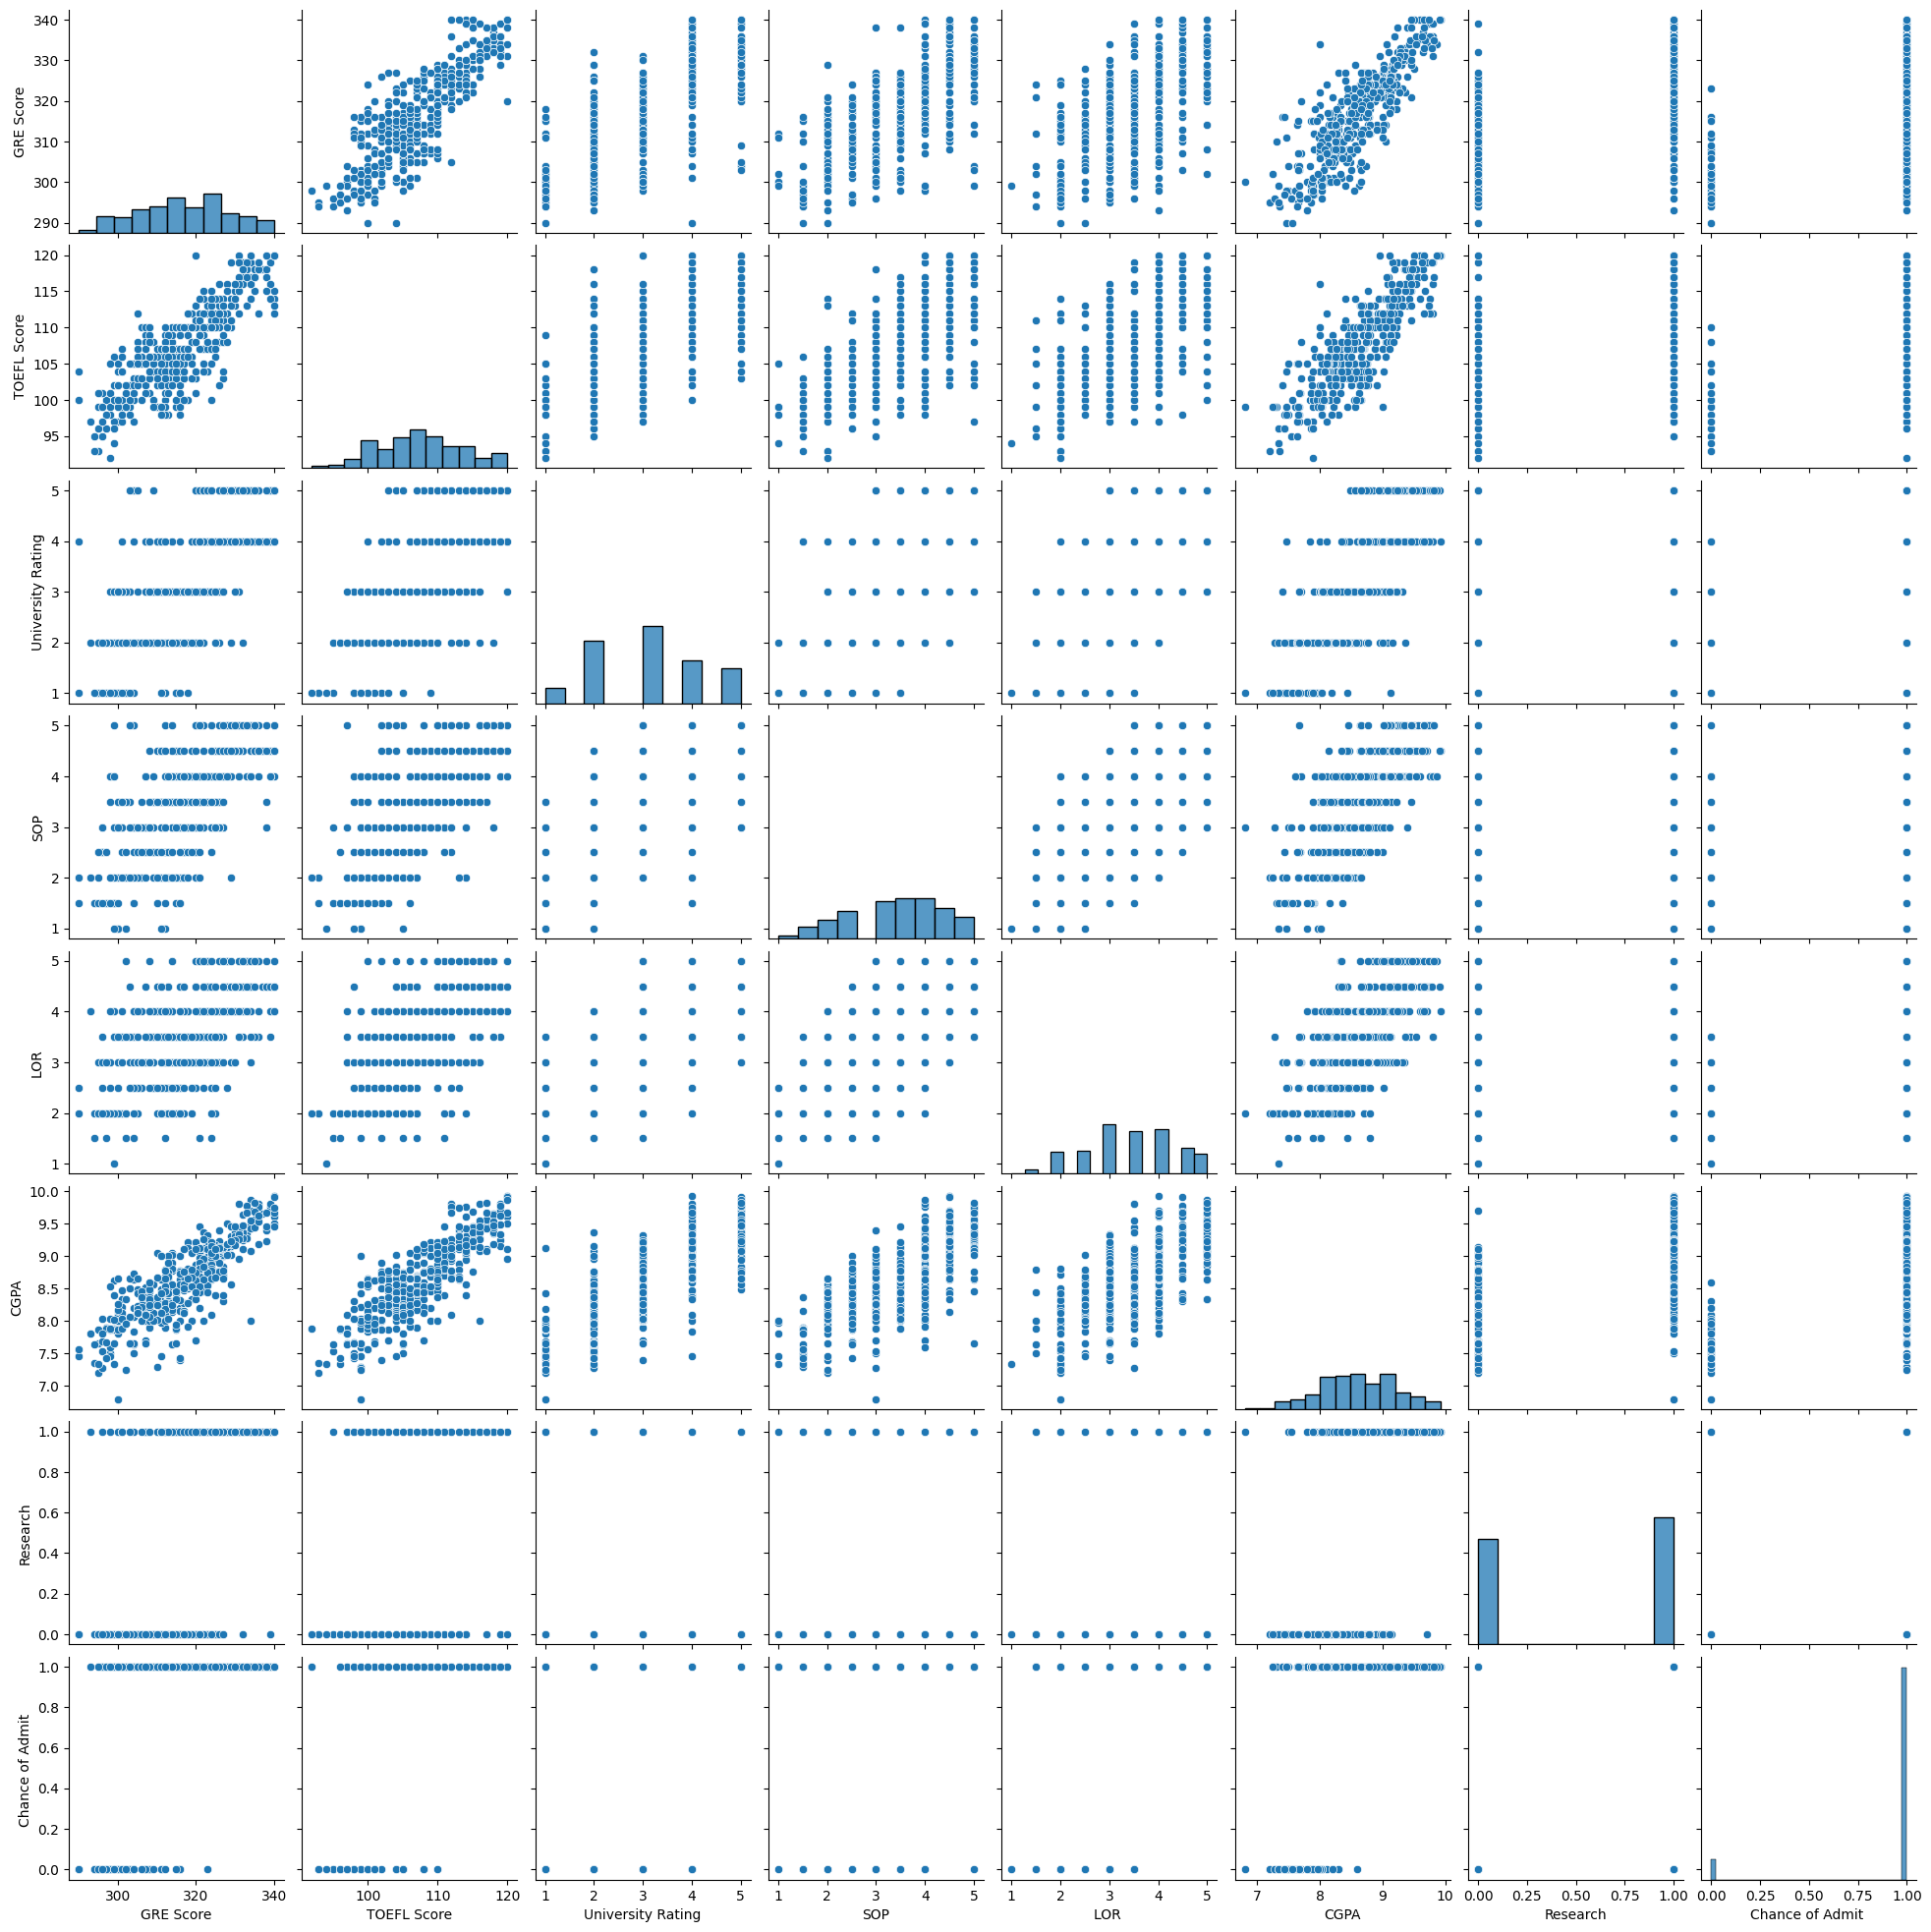

In [32]:
#pairplot for dataset

sns.pairplot(data)